In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
# Importing data
df = pd.read_csv('../data/train.csv')
df_val = pd.read_csv('../data/val.csv')

In [3]:
# Convert all categorical features to numerical ones.
numerical_features = ['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
df_numerical = pd.DataFrame()
df_numerical[numerical_features] = df[numerical_features]
df_numerical['Gender'] = df['Gender'].map({"Female" : 0, "Male" : 1})
binary_categorical_features = ['H_Cal_Consump', 'Smoking', 'Fam_Hist', 'H_Cal_Burn'] # Yes or no
for feature in binary_categorical_features:
    df_numerical[feature] = df[feature].map({"no" : 0, "yes" : 1})
multi_categorical_features = ['Alcohol_Consump', 'Food_Between_Meals', 'Transport']
for feature in multi_categorical_features:
    values = (list(set(df[feature])))
    for value in values:
        df_numerical[feature+"_"+value] = df[feature].map(lambda x: 1 if x==value else 0)
df_numerical['Body_Level'] = df['Body_Level']

In [4]:
# Convert all categorical features to numerical ones. (for validation set)
numerical_features = ['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
df_numerical_val = pd.DataFrame()
df_numerical_val[numerical_features] = df_val[numerical_features]
df_numerical_val['Gender'] = df_val['Gender'].map({"Female" : 0, "Male" : 1})
binary_categorical_features = ['H_Cal_Consump', 'Smoking', 'Fam_Hist', 'H_Cal_Burn'] # Yes or no
for feature in binary_categorical_features:
    df_numerical_val[feature] = df_val[feature].map({"no" : 0, "yes" : 1})
multi_categorical_features = ['Alcohol_Consump', 'Food_Between_Meals', 'Transport']
for feature in multi_categorical_features:
    values = (list(set(df_val[feature])))
    for value in values:
        df_numerical_val[feature+"_"+value] = df_val[feature].map(lambda x: 1 if x==value else 0)
df_numerical_val['Body_Level'] = df_val['Body_Level']

In [5]:
features = list(df_numerical.columns.array)
features.reverse()
label = features.pop(0)
features.reverse()
# An extra step done for the validation set since it may not contain all the categories of a specific attribute due to its smaller size.
for feature in features:
    if feature not in list(df_numerical_val.columns.array):
        df_numerical_val[feature] = 0

In [6]:
# Hyperparmeters:
max_iter=500

### penalty='l2', max_iter=500, multi_class='ovr', solver='liblinear'

In [7]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='liblinear')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 4
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 3

[296 rows x 1 columns]


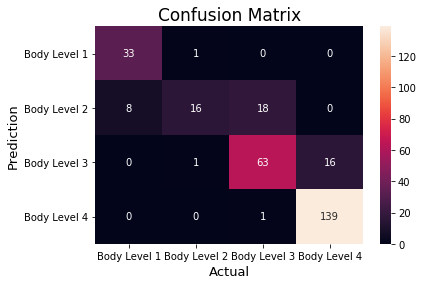

In [8]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [9]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.847972972972973
Precision : [0.80487805 0.88888889 0.76829268 0.89677419] Macro Precision : 0.8397084535361483
Recall    : [0.97058824 0.38095238 0.7875     0.99285714] Macro Recall    : 0.7829744397759104
F1-score  : [0.88       0.53333333 0.77777778 0.94237288] Macro F1-score  : 0.7833709981167608
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=500, multi_class='ovr', solver='lbfgs'

In [10]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='lbfgs')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 2
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 2

[296 rows x 1 columns]


d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


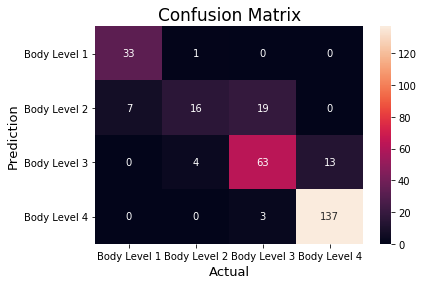

In [11]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [12]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.8412162162162162
Precision : [0.825      0.76190476 0.74117647 0.91333333] Macro Precision : 0.8103536414565826
Recall    : [0.97058824 0.38095238 0.7875     0.97857143] Macro Recall    : 0.7794030112044819
F1-score  : [0.89189189 0.50793651 0.76363636 0.94482759] Macro F1-score  : 0.777073087417915
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=500, multi_class='ovr', solver='newton-cg'

In [13]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='newton-cg')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 2
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 2

[296 rows x 1 columns]


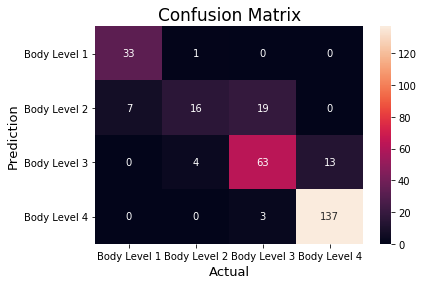

In [14]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [15]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.8412162162162162
Precision : [0.825      0.76190476 0.74117647 0.91333333] Macro Precision : 0.8103536414565826
Recall    : [0.97058824 0.38095238 0.7875     0.97857143] Macro Recall    : 0.7794030112044819
F1-score  : [0.89189189 0.50793651 0.76363636 0.94482759] Macro F1-score  : 0.777073087417915
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=500, multi_class='ovr', solver='sag'

In [16]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='sag')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 4
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 4
294  Body Level 4
295  Body Level 3

[296 rows x 1 columns]


d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


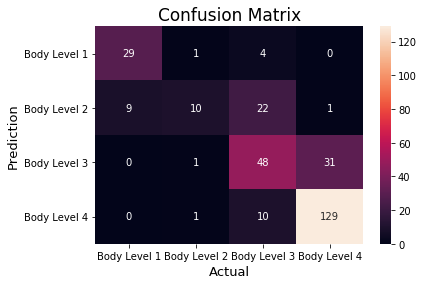

In [17]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [18]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.7297297297297297
Precision : [0.76315789 0.76923077 0.57142857 0.80124224] Macro Precision : 0.7262648678552569
Recall    : [0.85294118 0.23809524 0.6        0.92142857] Macro Recall    : 0.6531162464985993
F1-score  : [0.80555556 0.36363636 0.58536585 0.85714286] Macro F1-score  : 0.6529251574983282
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=500, multi_class='ovr', solver='saga'

In [35]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=10000, multi_class='ovr', solver='saga')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 4
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 3

[296 rows x 1 columns]


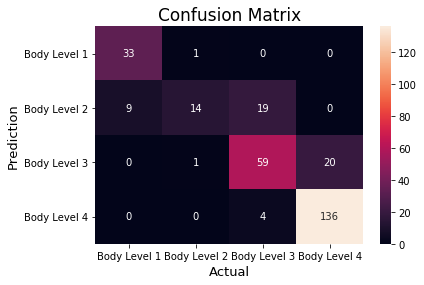

In [36]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [37]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.8175675675675675
Precision : [0.78571429 0.875      0.7195122  0.87179487] Macro Precision : 0.8130053381577772
Recall    : [0.97058824 0.33333333 0.7375     0.97142857] Macro Recall    : 0.7532125350140056
F1-score  : [0.86842105 0.48275862 0.72839506 0.91891892] Macro F1-score  : 0.749623413492137
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l1', max_iter=500, multi_class='ovr', solver='liblinear'

In [38]:
# Training.
LM_model = LogisticRegression(penalty='l1', max_iter=max_iter, multi_class='ovr', solver='liblinear')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 3
3    Body Level 2
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 3

[296 rows x 1 columns]


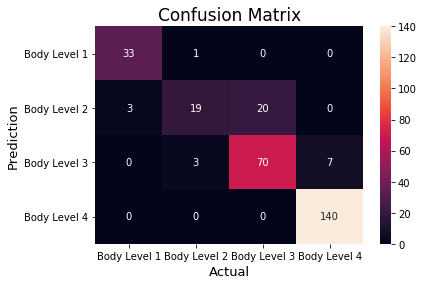

In [39]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [40]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.8851351351351351
Precision : [0.91666667 0.82608696 0.77777778 0.95238095] Macro Precision : 0.8682280883367839
Recall    : [0.97058824 0.45238095 0.875      1.        ] Macro Recall    : 0.8244922969187676
F1-score  : [0.94285714 0.58461538 0.82352941 0.97560976] Macro F1-score  : 0.8316529238336986
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=500, multi_class='ovr', solver='liblinear', C=100000.0

In [41]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='liblinear', C=100000.0) #lambda = 1/C = 0.00001
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])
# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
# print(LM_pred)

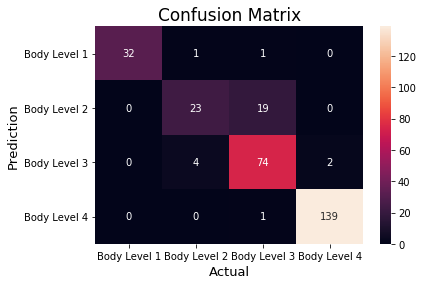

In [42]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [43]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.9054054054054054
Precision : [1.         0.82142857 0.77894737 0.9858156 ] Macro Precision : 0.8965478856716258
Recall    : [0.94117647 0.54761905 0.925      0.99285714] Macro Recall    : 0.8516631652661064
F1-score  : [0.96969697 0.65714286 0.84571429 0.98932384] Macro F1-score  : 0.8654694889926207
Support  : [ 34  42  80 140] Macro Support  : 74.0
